# Generate Wavefront Errors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = 1000 # Number of sampling points
xdim = 300e-6 # Size of viewing window [m]
pixel = xdim/nx # Pixel size [m]
aperture_size = 270e-6 # Optic aperture size [m]
error_amplitude = 20e-12 # Peak wavefront error amplitude [pm]

In [3]:
error_position = np.linspace(-xdim/2, xdim/2, nx)
error_wavefront = error_amplitude*np.sin(2*np.pi*error_position/xdim)
aperture_size = int(aperture_size/(2*pixel))
center = int(nx/2)
error_wavefront[:center-aperture_size] = 0
error_wavefront[center+aperture_size:] = 0

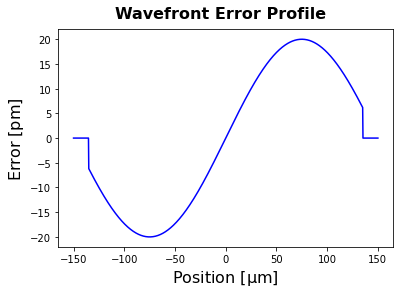

In [6]:
output = np.array(list(zip(error_position*1e6, error_wavefront*1e12)))
np.savetxt("./data/sin_error.csv", output, header="y(um),z(pm)", delimiter=",")

fig = plt.figure()
fig.suptitle('Wavefront Error Profile', y=0.96, fontweight='bold', fontsize=16)
plt.xlabel('Position [$\mathrm{\mu m}$]', fontsize=16)
plt.ylabel('Error [$\mathrm{pm}$]', fontsize=16)   
plt.plot(error_position*1e6, error_wavefront*1e12, 'b')
plt.show()